In [1]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

df = sns.load_dataset('diamonds')

print(f"Temos {df.shape[0]} diamantes.")
df.head()

Temos 53940 diamantes.


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
mapa_corte = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
mapa_cor = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7} # D é o melhor!
mapa_clarity = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}

df['cut'] = df['cut'].map(mapa_corte)
df['color'] = df['color'].map(mapa_cor)
df['clarity'] = df['clarity'].map(mapa_clarity)


In [9]:
y = df['price']

X = df.drop(['price'], axis =1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

rf = RandomForestRegressor(n_estimators= 100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_rf)

print("-" * 30)
print(f"Erro Médio Absoluto (MAE): ${mae:.2f}")
print("-" * 30)

------------------------------
Erro Médio Absoluto (MAE): $266.57
------------------------------


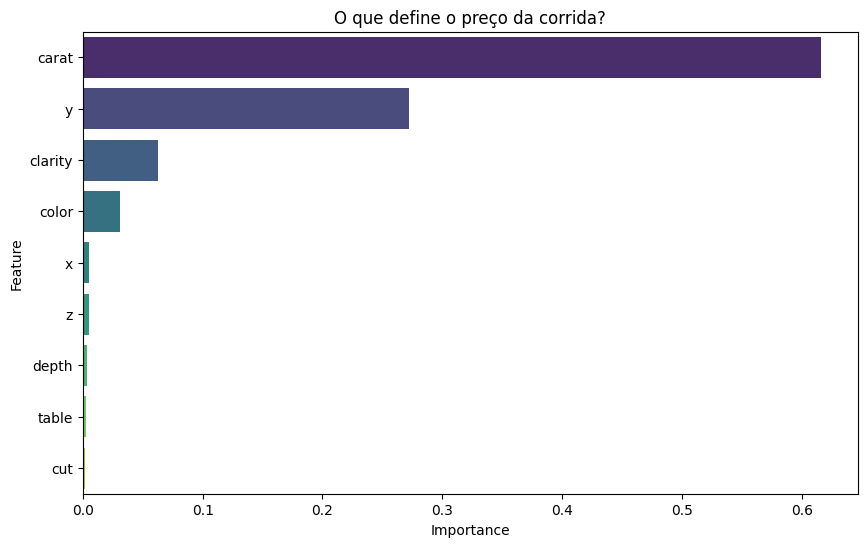

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importancias = rf.feature_importances_
nomes_colunas = X_train.columns

df_imp = pd.DataFrame({'Feature': nomes_colunas, 'Importance': importancias})
df_imp = df_imp.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_imp, hue='Feature', legend=False, palette='viridis')
plt.title('O que define o preço da corrida?')
plt.show()